In [105]:
import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

import pandas as pd

from sklearn.linear_model import Lasso

from numpy import float64
import pysindy as ps

from pysindy.feature_library import PDELibrary


In [106]:
import numpy as np

def tinkerbell(x, y, a=0.9, b=-0.6013, c=2.0, d=0.50):
    x_prime = x**2 - y**2 + a*x + b*y
    y_prime = 2*x*y + c*x + d*y
    return x_prime, y_prime

# Number of iterations
steps = 10000

# Arrays to store data
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# Initial point
X[0], Y[0] = -0.72, -0.64

# Generate data points
for i in range(steps):
    x_next, y_next = tinkerbell(X[i], Y[i])
    X[i+1] = x_next
    Y[i+1] = y_next


In [107]:
#

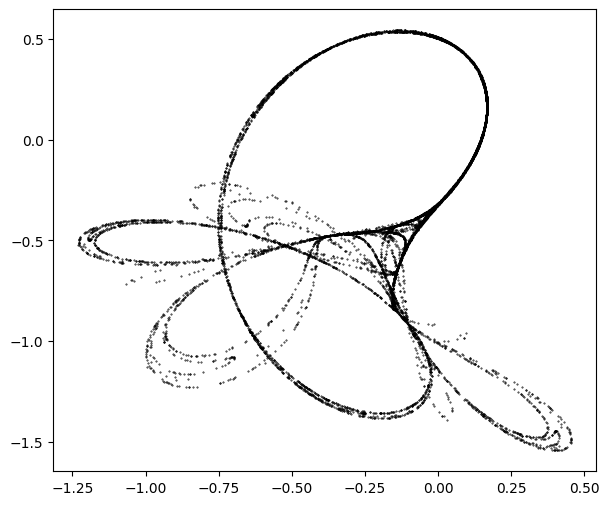

In [108]:
# plot figure
plt.figure(figsize=(7,6))
plt.plot(X, Y, '.', color='black',  markersize=0.8)
plt.axis('on')
plt.show()
#plt.close()


Text(0.5, 0.92, '(Y)Taken´s Embedding Approach with tau= 1')

<Figure size 1600x1000 with 0 Axes>

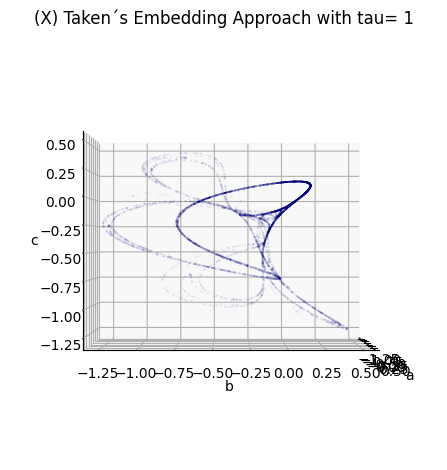

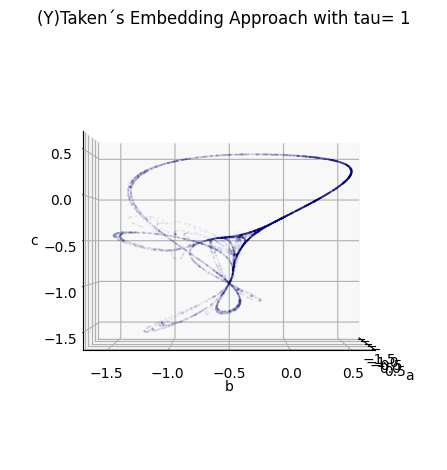

In [109]:
plt.figure(figsize=(16, 10))



tau=1 # time delay between observation functions

# Observation functions. 
a= X[:-2*tau] 
b= X[tau:-tau]
c= X[2*tau:]

d= Y[:-2*tau] 
e= Y[tau:-tau]
f= Y[2*tau:]

# Plot Takens Delay Time Embedding
fig = plt.figure()
fig.set_tight_layout(True)
ax = fig.add_subplot(projection="3d")
ax.scatter(xs=c, ys=b, zs=a, color="navy", alpha=0.09, s=0.1)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.view_init(elev=0, azim=0)
ax.set_title("(X) Taken´s Embedding Approach with tau= " + str(tau) )

fig = plt.figure()
fig.set_tight_layout(True)
ax = fig.add_subplot(projection="3d")
ax.scatter(xs=f, ys=e, zs=d, color="navy", alpha=0.09, s=0.1)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.view_init(elev=0, azim=0)
ax.set_title("(Y)Taken´s Embedding Approach with tau= " + str(tau) )




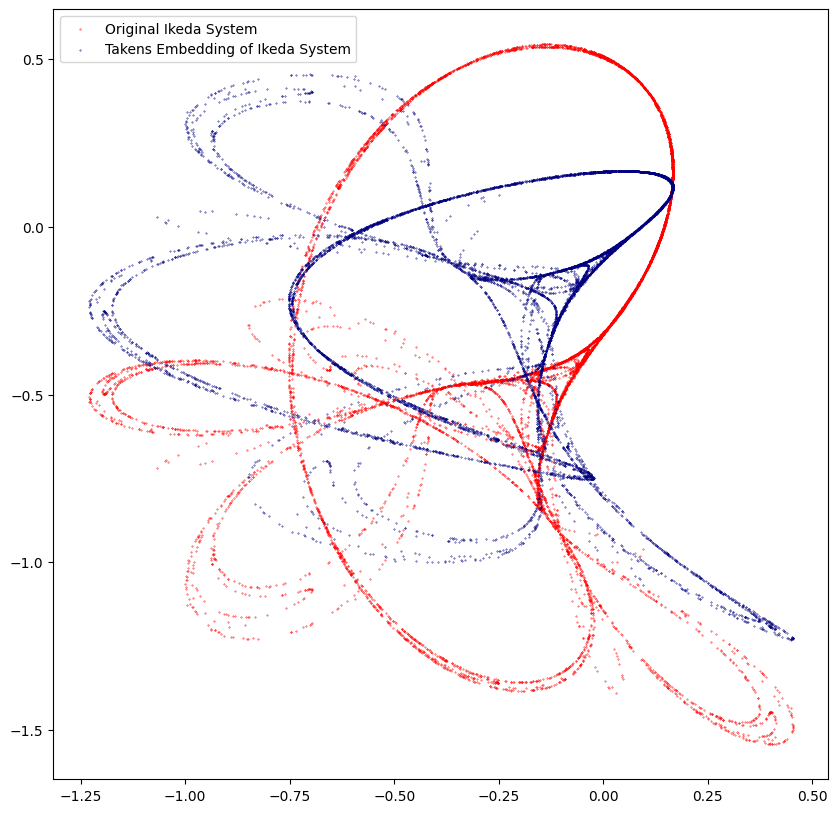

In [110]:
plt.figure(figsize=(10, 10))

plt.scatter(X, Y, s=0.1, c='red', label='Original Ikeda System')
plt.scatter(b, a, s=0.1, c='navy', label='Takens Embedding of Ikeda System')
plt.legend() 

Hankel matrix

In [111]:
ssr = 10

H = np.zeros([ssr, len(X)-ssr])
for i in range(ssr):
   H[i, :] = X[i:-(ssr-i)]

H.shape


(10, 9991)

SVD

In [112]:
U, S, vh = np.linalg.svd(H)

Vt = vh.T

print("shape of vh",vh.shape) 
print("shape of u" ,U.shape)
print("shape of sigma",S.shape)
      
len(vh[0])
print(vh[0].shape)
print(vh[1].shape)
len(Vt[0])
print(Vt[0].shape)
print(Vt[1].shape)

shape of vh (9991, 9991)
shape of u (10, 10)
shape of sigma (10,)
(9991,)
(9991,)
(9991,)
(9991,)


Derivative

In [113]:

#central differnce
def central_difference(x_v, h=1):
    dx = np.zeros([len(x_v)-2] )
    for i in range(1, len(x_v)-1):
        dx[i-1] = (x_v[i+1] - x_v[i-1]) / (2*h)
    return dx


In [114]:
r = 10

dVt = np.zeros([len(Vt[0])-2, r])

for i in range(r):
    dVt[:, i] = central_difference(Vt[:, i])

dVt.shape

(9989, 10)

In [115]:
input_data = np.vstack((X, Y)).T

input_data.shape
lasso_optimizer = Lasso(alpha=0.08, max_iter=8000, fit_intercept=False)
stql_optimizer= optimizer=ps.STLSQ(threshold=0.01)


library_polynom = ps.PolynomialLibrary(degree=2)
library_fourier = ps.FourierLibrary(n_frequencies=3)

library = ps.ConcatLibrary([library_polynom, library_fourier])
library.fit(input_data)
print(library.get_feature_names())
print(len(library.get_feature_names()))

model = ps.SINDy(discrete_time=True, feature_library=library, optimizer=stql_optimizer) #    
model.fit(input_data)

model.print()
sim = model.simulate(input_data[0, :], t=8000)
sim

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'sin(1 x0)', 'cos(1 x0)', 'sin(1 x1)', 'cos(1 x1)', 'sin(2 x0)', 'cos(2 x0)', 'sin(2 x1)', 'cos(2 x1)', 'sin(3 x0)', 'cos(3 x0)', 'sin(3 x1)', 'cos(3 x1)']
18
(x0)[k+1] = 0.900 x0[k] + -0.601 x1[k] + 1.000 x0[k]^2 + -1.000 x1[k]^2
(x1)[k+1] = 2.000 x0[k] + 0.500 x1[k] + 2.000 x0[k] x1[k]


array([[-0.72      , -0.64      ],
       [-0.154368  , -0.8384    ],
       [-0.31388636, -0.46909174],
       ...,
       [-0.28918868, -0.47389395],
       [-0.11626276, -0.5412348 ],
       [-0.05861008, -0.37729202]])

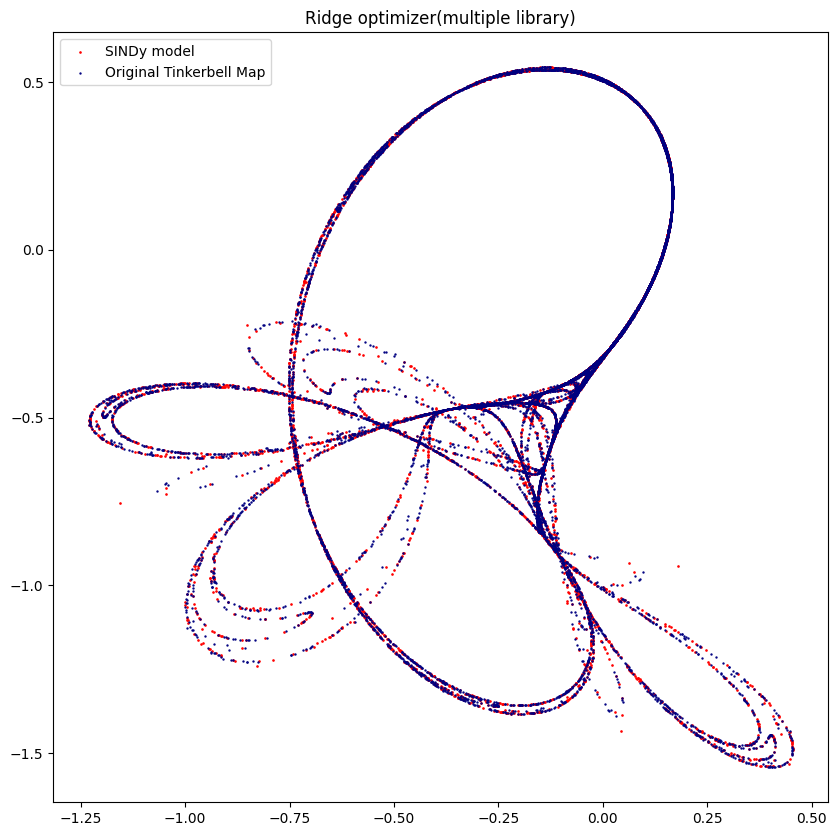

In [116]:
plt.figure(figsize=(10, 10))

plt.scatter(sim[:, 0], sim[:, 1], s=0.8, c='red', label='SINDy model')
plt.scatter(X, Y, s=0.5, c='navy', label='Original Tinkerbell Map')
plt.title("Ridge optimizer(multiple library)")
plt.legend()   

In [119]:
data = np.vstack((X, Y)).T


lasso_optimizer = Lasso(alpha=0.08, max_iter=8000, fit_intercept=False)

library_polynom = ps.PolynomialLibrary(degree=2)
library_fourier = ps.FourierLibrary(n_frequencies=3)

library = ps.ConcatLibrary([library_polynom, library_fourier])
library.fit(data)
print(library.get_feature_names())
print(len(library.get_feature_names()))

model = ps.SINDy(discrete_time=True, feature_library=library, optimizer=lasso_optimizer)    
model.fit(data)

model.print()
sim = model.simulate(data[0, :], t=8000)
sim

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'sin(1 x0)', 'cos(1 x0)', 'sin(1 x1)', 'cos(1 x1)', 'sin(2 x0)', 'cos(2 x0)', 'sin(2 x1)', 'cos(2 x1)', 'sin(3 x0)', 'cos(3 x0)', 'sin(3 x1)', 'cos(3 x1)']
18
(x0)[k+1] = -0.081 1 + -0.420 x1[k]^2 + -0.201 sin(3 x1[k])
(x1)[k+1] = -0.055 1 + 0.304 x1[k] + 0.748 sin(2 x0[k])


array([[-0.72      , -0.64      ],
       [-0.06406747, -0.99095558],
       [-0.45948101, -0.45143809],
       ...,
       [-0.01788429, -0.1169474 ],
       [-0.01788429, -0.1169474 ],
       [-0.01788429, -0.1169474 ]])

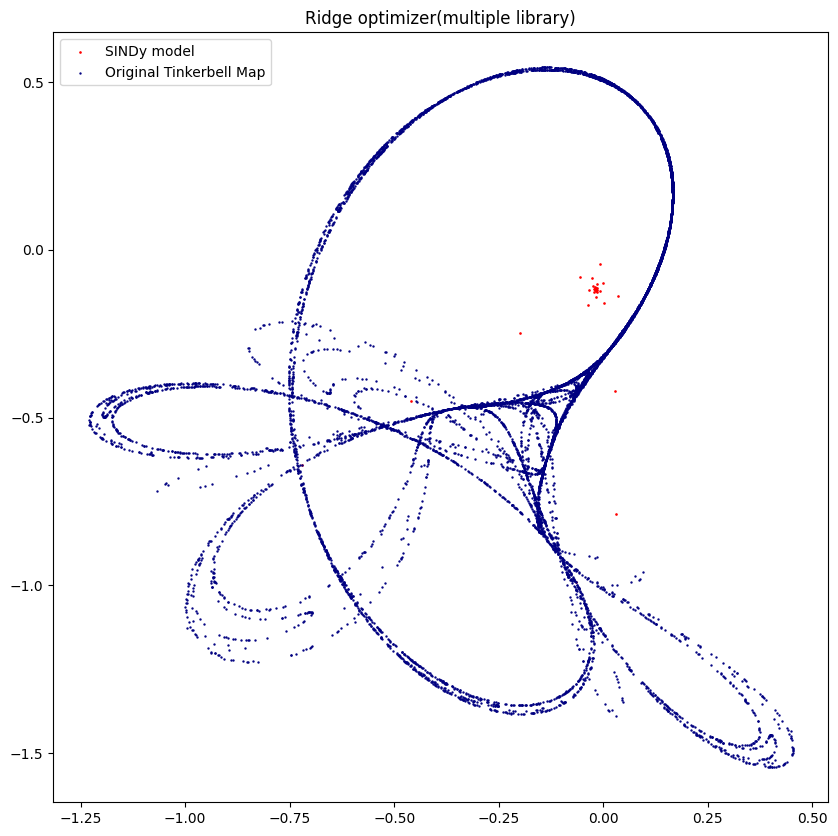

In [120]:
plt.figure(figsize=(10, 10))

plt.scatter(sim[:, 0], sim[:, 1], s=0.8, c='red', label='SINDy model')
plt.scatter(X, Y, s=0.5, c='navy', label='Original Tinkerbell Map')
plt.title("Lasso optimizer(multiple library)")
plt.legend()  